In [25]:
import os
import cv2
import numpy as np
from keras.models import load_model
from metrics import top_3_acc
from os import listdir
from PIL import Image
from random import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
images_folder_path = "/Users/filipgulan/Downloads/robust_ml_challenge_testset"
images = [f for f in listdir(images_folder_path) if f.endswith(".jpg")]
images = [os.path.join(images_folder_path, f) for f in listdir(images_folder_path)]

In [12]:
model = load_model('../models/model.hdf5',custom_objects={'top_3_acc': top_3_acc})

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy', top_3_acc])

In [18]:
## Ovo treba povuci kod treniranja => train_generator.class_indices
## i spremiti u model da ja mogu povuci kao custom varijablu iz modela

labels = {
 'Albertsons': 0,
 'BJs': 1,
 'CVSPharmacy': 2,
 'Costco': 3,
 'FredMeyer': 4,
 'Frys': 5,
 'HEB': 6,
 'HarrisTeeter': 7,
 'HyVee': 8,
 'JewelOsco': 9,
 'KingSoopers': 10,
 'Kroger': 11,
 'Meijer': 12,
 'NonReceipt': 13,
 'Publix': 14,
 'Safeway': 15,
 'SamsClub': 16,
 'ShopRite': 17,
 'Smiths': 18,
 'StopShop': 19,
 'Target': 20,
 'Walgreens': 21,
 'Walmart': 22,
 'Wegmans': 23,
 'WholeFoodsMarket': 24,
 'WinCoFoods': 25}

labels = {v: k for k, v in labels.items()}

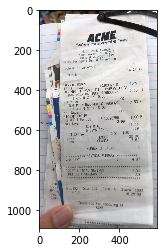

Class: Meijer  Conf: 0.99998593


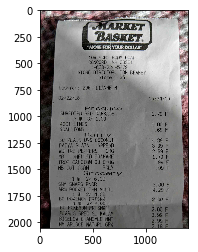

Class: Meijer  Conf: 1.0


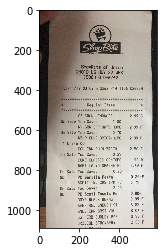

Class: Meijer  Conf: 1.0


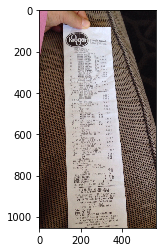

Class: Meijer  Conf: 1.0


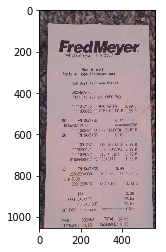

Class: Meijer  Conf: 1.0


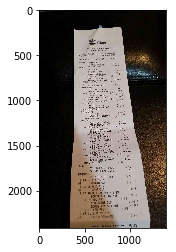

Class: Meijer  Conf: 1.0


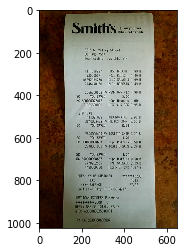

Class: Meijer  Conf: 1.0


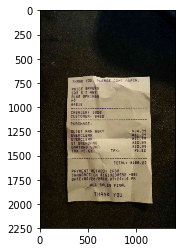

Class: Meijer  Conf: 1.0


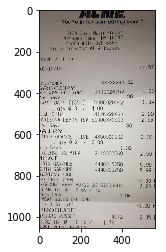

Class: SamsClub  Conf: 1.0


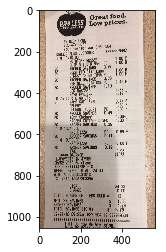

Class: SamsClub  Conf: 1.0


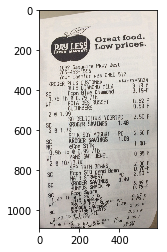

Class: SamsClub  Conf: 1.0


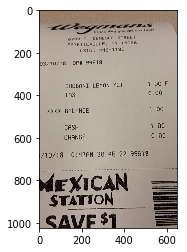

Class: SamsClub  Conf: 1.0


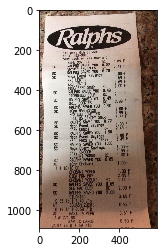

Class: Meijer  Conf: 1.0


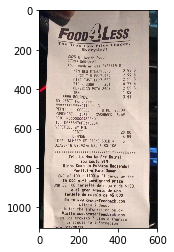

Class: Meijer  Conf: 1.0


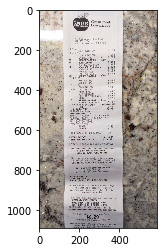

Class: Meijer  Conf: 1.0


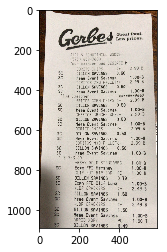

Class: Meijer  Conf: 1.0


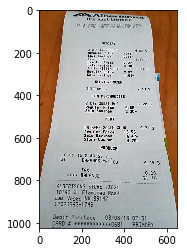

Class: SamsClub  Conf: 1.0


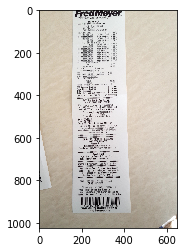

Class: SamsClub  Conf: 1.0


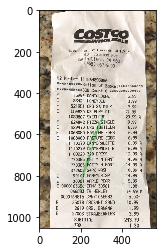

Class: Meijer  Conf: 1.0


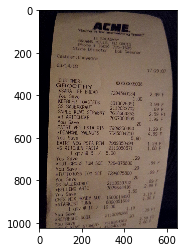

Class: Meijer  Conf: 1.0


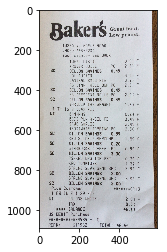

Class: Meijer  Conf: 1.0


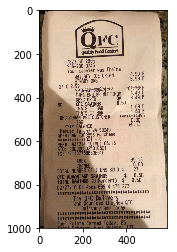

Class: Meijer  Conf: 0.9999658


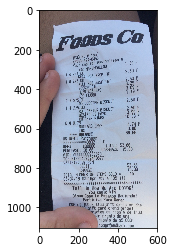

Class: Meijer  Conf: 1.0


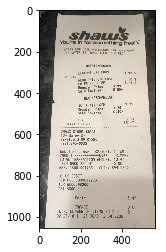

Class: Meijer  Conf: 1.0


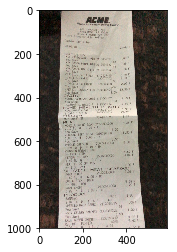

Class: Meijer  Conf: 1.0


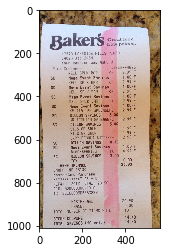

Class: Meijer  Conf: 0.9991592


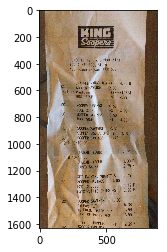

Class: Meijer  Conf: 1.0


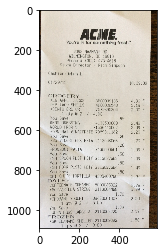

Class: Meijer  Conf: 1.0


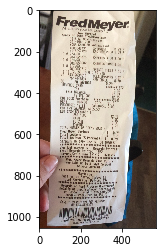

Class: Meijer  Conf: 1.0


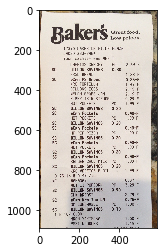

Class: Meijer  Conf: 1.0


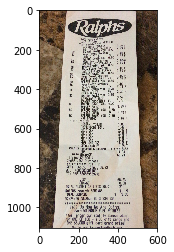

Class: Meijer  Conf: 1.0


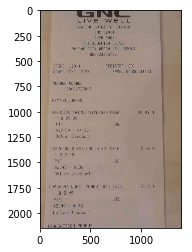

Class: SamsClub  Conf: 1.0


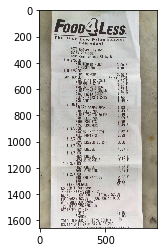

Class: SamsClub  Conf: 0.9980775


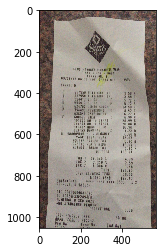

Class: Meijer  Conf: 1.0


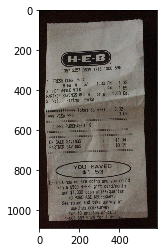

Class: Meijer  Conf: 1.0


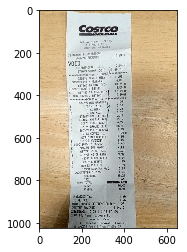

Class: SamsClub  Conf: 1.0


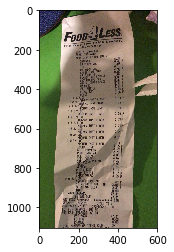

Class: Meijer  Conf: 1.0


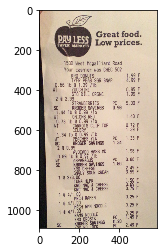

Class: Meijer  Conf: 1.0


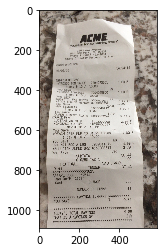

Class: Meijer  Conf: 1.0


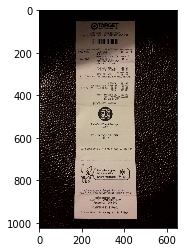

Class: Costco  Conf: 1.0


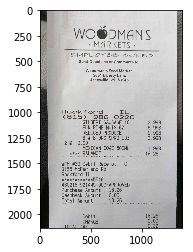

Class: Meijer  Conf: 1.0


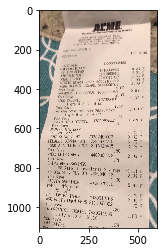

Class: Meijer  Conf: 1.0


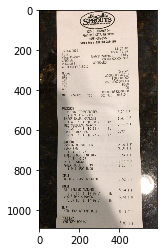

Class: Meijer  Conf: 1.0


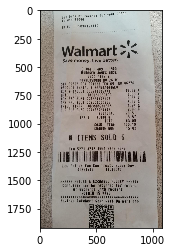

Class: SamsClub  Conf: 1.0


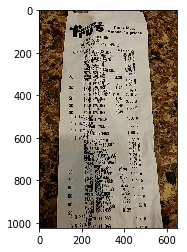

Class: Costco  Conf: 1.0


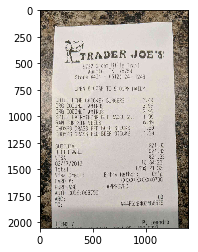

Class: Meijer  Conf: 1.0


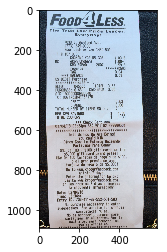

Class: Meijer  Conf: 1.0


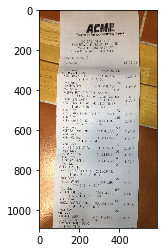

Class: Meijer  Conf: 1.0


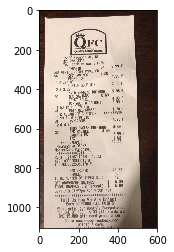

Class: Meijer  Conf: 1.0


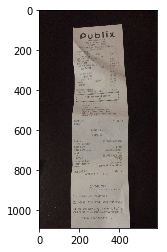

Class: Meijer  Conf: 1.0


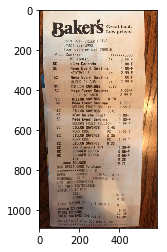

Class: Meijer  Conf: 1.0


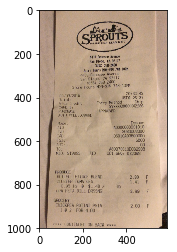

Class: Meijer  Conf: 1.0


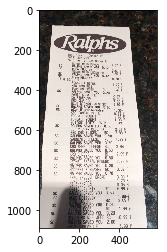

Class: Meijer  Conf: 1.0


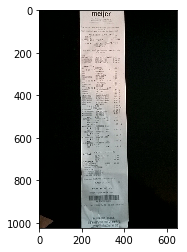

Class: Costco  Conf: 1.0


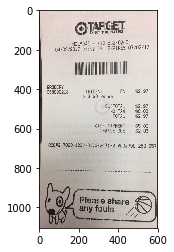

Class: Meijer  Conf: 1.0


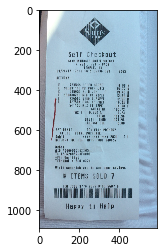

Class: SamsClub  Conf: 1.0


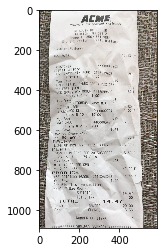

Class: Meijer  Conf: 1.0


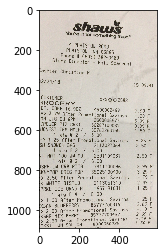

Class: SamsClub  Conf: 1.0


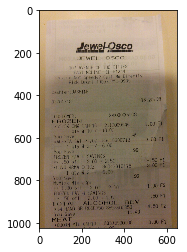

Class: SamsClub  Conf: 1.0


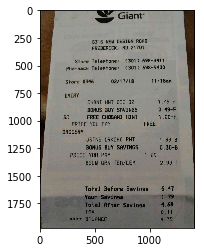

Class: Meijer  Conf: 1.0


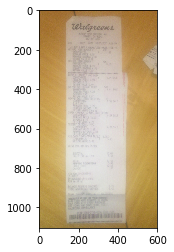

Class: SamsClub  Conf: 1.0


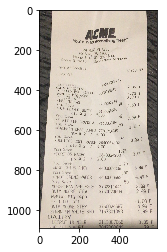

Class: Meijer  Conf: 1.0


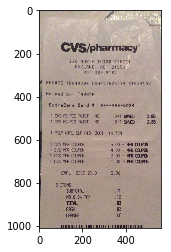

Class: SamsClub  Conf: 0.9999999


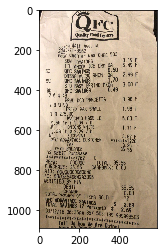

Class: Meijer  Conf: 1.0


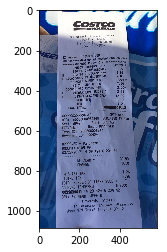

Class: SamsClub  Conf: 1.0


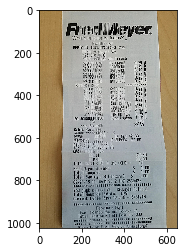

Class: SamsClub  Conf: 1.0


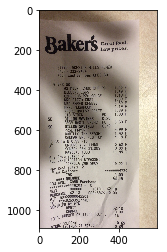

Class: SamsClub  Conf: 1.0


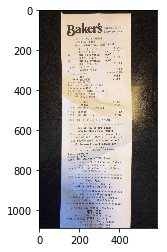

Class: Meijer  Conf: 1.0


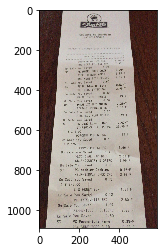

Class: Meijer  Conf: 1.0


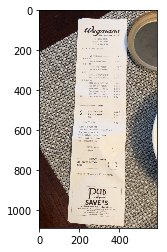

Class: Meijer  Conf: 1.0


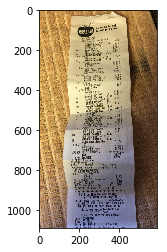

Class: Meijer  Conf: 1.0


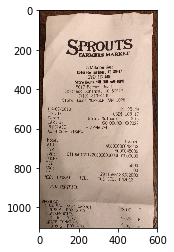

Class: Meijer  Conf: 1.0


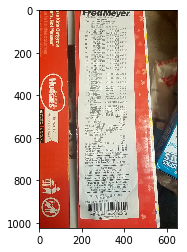

Class: Wegmans  Conf: 0.9998913


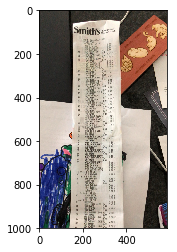

Class: Meijer  Conf: 0.9995633


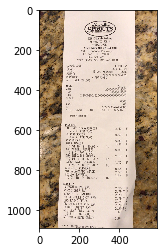

Class: Meijer  Conf: 1.0


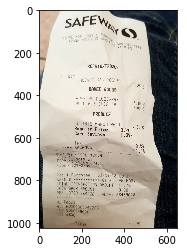

Class: Meijer  Conf: 1.0


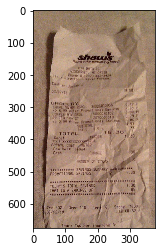

Class: Meijer  Conf: 1.0


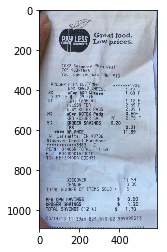

Class: SamsClub  Conf: 1.0


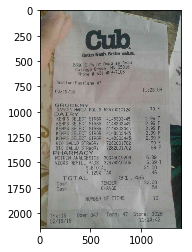

Class: Meijer  Conf: 1.0


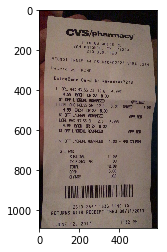

Class: Meijer  Conf: 1.0


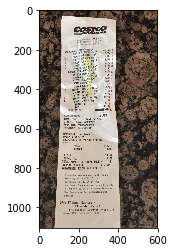

Class: Meijer  Conf: 1.0


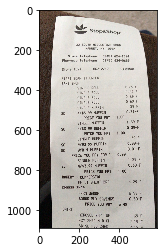

Class: Meijer  Conf: 1.0


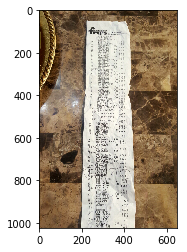

Class: Meijer  Conf: 1.0


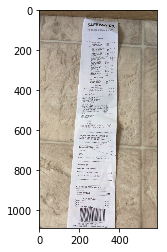

Class: SamsClub  Conf: 1.0


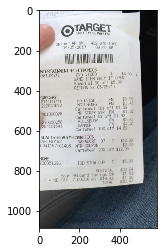

Class: Meijer  Conf: 1.0


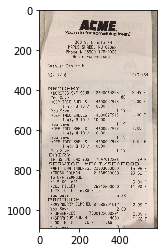

Class: SamsClub  Conf: 1.0


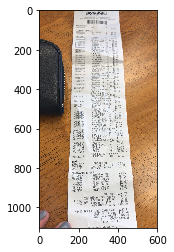

Class: Meijer  Conf: 1.0


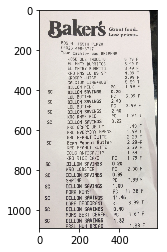

Class: SamsClub  Conf: 1.0


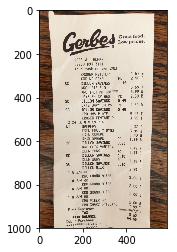

In [ ]:
plt.figure()
shuffle(images)
##Moze se i prvo napraviti predict u batchu
##pa samo prolaziti kroz rezultate dole..

for i, image_name in enumerate(images[0:100]):
    image = Image.open(image_name)
    plt.imshow(image)
    img = cv2.imread(image_name)
    img = cv2.resize(img,(299,164))
    img = np.reshape(img,[1,299,164,3])
    plt.show()
    classes = model.predict(img)
    predicted_class = np.argmax(classes)
    print("Class:", labels[predicted_class], " Conf:",classes[0][predicted_class])